In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [7]:

df = pd.read_csv('../../dataset/training/train_lyrics_1000.csv', index_col=0)



In [8]:
df.head()


,artist,title,lyrics,genre,mood,year
file,,,,,,
TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007
TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",Rock,sad,1987


In [10]:
#df with only sad songs
is_sad =  df['mood']=='sad'
df_sad = df[is_sad]
df_sad


In [12]:
#df with only faapy songs 
is_happy =  df['mood']=='happy'
df_happy = df[is_happy]
df_happy

,artist,title,lyrics,genre,mood,year
file,,,,,,
TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
TRAABVM128F92CA9DC.h5,Tesla,Caught In A Dream,If you can imagine this\nThe whole world shari...,Rock,happy,2004
TRAACER128F4290F96.h5,The Dillinger Escape Plan,Setting Fire to Sleeping Giants,First off let me say you look so tired...\nRes...,Rock,happy,2004
TRAACFV128F935E50B.h5,SUE THOMPSON,James (Hold The Ladder Steady),"James, James hold the ladder steady\nJames, Ja...",Pop,happy,1985
TRAADNA128F9331246.h5,Stevie Ray Vaughan,Crossfire,"Day by day, night after night,\nBlinded by the...",Blues,happy,1992
TRAADYI128E078FB38.h5,Lost Boyz,Certain Things We Do,(Chorus: Mr. Cheeks)\nAll my ladies and mens t...,Hip Hop/Rap,happy,1997
TRAAEEH128E0795DFE.h5,Chris Rea,Driving Home For Christmas,I'm driving home for Christmas\nI can't wait t...,Rock,happy,1986
TRAAFJW128F428A424.h5,NOFX,Stickin In My Eye,"When I look 'round, I only see outta one eye\n...",Rock,happy,1992


### Word cloud object for generating and drawing.



Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font; you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=200)
    Height of the canvas.

prefer_horizontal : float (default=0.90)
    The ratio of times to try horizontal fitting as opposed to vertical.
    If prefer_horizontal < 1, the algorithm will try rotating the word
    if it doesn't fit. (There is currently no built-in way to get only
    vertical words.)

mask : nd-array or None (default=None)
    If not None, gives a binary mask on where to draw words. If mask is not
    None, width and height will be ignored, and the shape of mask will be
    used instead. All white (#FF or #FFFFFF) entries will be considered
    "masked out" while other entries will be free to draw on. [This
    changed in the most recent version!]

contour_width: float (default=0)
    If mask is not None and contour_width > 0, draw the mask contour.

contour_color: color value (default="black")
    Mask contour color.

scale : float (default=1)
    Scaling between computation and drawing. For large word-cloud images,
    using scale instead of larger canvas size is significantly faster, but
    might lead to a coarser fit for the words.

min_font_size : int (default=4)
    Smallest font size to use. Will stop when there is no more room in this
    size.

font_step : int (default=1)
    Step size for the font. font_step > 1 might speed up computation but
    give a worse fit.

max_words : number (default=200)
    The maximum number of words.

stopwords : set of strings or None
    The words that will be eliminated. If None, the build-in STOPWORDS
    list will be used.

background_color : color value (default="black")
    Background color for the word cloud image.

max_font_size : int or None (default=None)
    Maximum font size for the largest word. If None, the height of the image is
    used.

mode : string (default="RGB")
    Transparent background will be generated when mode is "RGBA" and
    background_color is None.

relative_scaling : float (default=.5)
    Importance of relative word frequencies for font-size.  With
    relative_scaling=0, only word-ranks are considered.  With
    relative_scaling=1, a word that is twice as frequent will have twice
    the size.  If you want to consider the word frequencies and not only
    their rank, relative_scaling around .5 often looks good.

    .. versionchanged: 2.0
        Default is now 0.5.

color_func : callable, default=None
    Callable with parameters word, font_size, position, orientation,
    font_path, random_state that returns a PIL color for each word.
    Overwrites "colormap".
    See colormap for specifying a matplotlib colormap instead.

regexp : string or None (optional)
    Regular expression to split the input text into tokens in process_text.
    If None is specified, ``r"\w[\w']+"`` is used.

collocations : bool, default=True
    Whether to include collocations (bigrams) of two words.

    .. versionadded: 2.0

colormap : string or matplotlib colormap, default="viridis"
    Matplotlib colormap to randomly draw colors from for each word.
    Ignored if "color_func" is specified.

    .. versionadded: 2.0

normalize_plurals : bool, default=True
    Whether to remove trailing 's' from words. If True and a word
    appears with and without a trailing 's', the one with trailing 's'
    is removed and its counts are added to the version without
    trailing 's' -- unless the word ends with 'ss'.

Attributes
----------
``words_`` : dict of string to float
    Word tokens with associated frequency.

    .. versionchanged: 2.0
        ``words_`` is now a dictionary

``layout_`` : list of tuples (string, int, (int, int), int, color))
    Encodes the fitted word cloud. Encodes for each word the string, font
    size, position, orientation, and color.

Notes
-----
Larger canvases will make the code significantly slower. If you need a
large word cloud, try a lower canvas size, and set the scale parameter.

The algorithm might give more weight to the ranking of the words
then their actual frequencies, depending on the ``max_font_size`` and the
scaling heuristic.
[1;31mFile:[0m           c:\intelpython3\lib\site-packages\wordcloud\wordcloud.py
[1;31mType:[0m           type

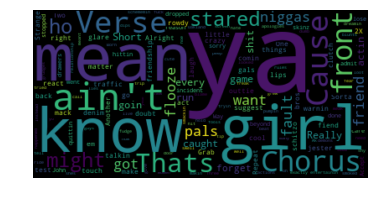

In [15]:
text = df.lyrics[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

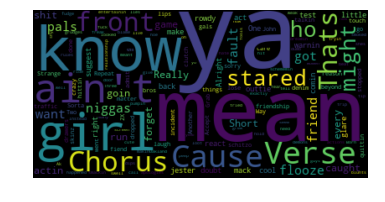

In [17]:
text_sad = df_sad.lyrics[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text_sad)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

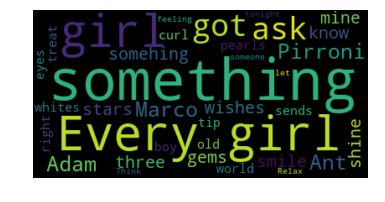

In [20]:
text_happy = df_happy.lyrics[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text_happy)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

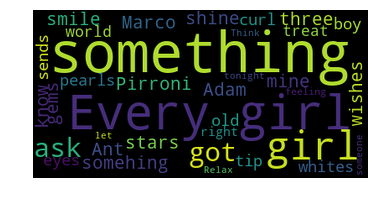

In [21]:
text_happy = df_happy.lyrics[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text_happy)

# Display the generated image:
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

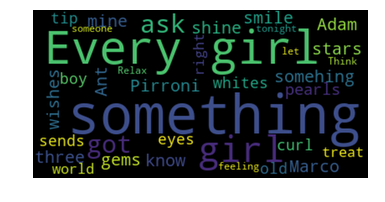

In [22]:
text_happy = df_happy.lyrics[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text_happy)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bessel')
plt.axis("off")
plt.show()

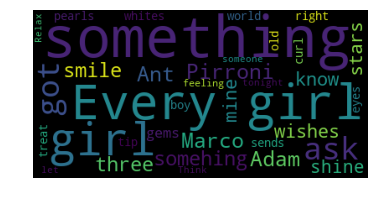

In [26]:
text_happy = df_happy.lyrics[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text_happy)

# Display the generated image:
plt.imshow(wordcloud, interpolation='hanning')
plt.axis("off")
plt.show()